In [1]:
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 

sns.set_theme(style="whitegrid")
sns.set_context('talk')

# Dados

Os dados foram obtidos através do portal da transparência da Câmara dos Deputados na aba de Dados Abertos: 

https://dadosabertos.camara.leg.br/swagger/api.html#staticfile

In [5]:
uri_gastos_2021 = 'https://www.camara.leg.br/cotas/Ano-2021.csv.zip'
uri_gastos_2020 = 'https://www.camara.leg.br/cotas/Ano-2020.csv.zip'
uri_gastos_2019 = 'https://www.camara.leg.br/cotas/Ano-2019.csv.zip'

In [6]:
gastos_2021 = pd.read_csv(uri_gastos_2021, sep=';', compression='zip')
gastos_2020 = pd.read_csv(uri_gastos_2020, sep=';',compression='zip')
gastos_2019 = pd.read_csv(uri_gastos_2019, sep=';',compression='zip')


In [72]:
gastos_2021.head()

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,txtDescricaoEspecificacao,txtFornecedor,txtCNPJCPF,txtNumero,indTipoDocumento,datEmissao,vlrDocumento,vlrGlosa,vlrLiquido,numMes,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,LIDERANÇA DO CIDADANIA,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,ARTESANAL SERVICOS DE ALIMENTACAO E BUFFET EIRELI,228.362.100/0015-7,104,4,2021-03-04T00:00:00,999.96,0.0,999.96,3,2021,0,NaN,NaN,1751471,NaN,NaN,3453,7165735,http://camara.leg.br/cota-parlamentar/nota-fis...
1,LIDERANÇA DO CIDADANIA,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,ARTESANAL SERVICOS DE ALIMENTACAO E BUFFET EIRELI,228.362.100/0015-7,111,4,2021-03-11T00:00:00,999.96,0.0,999.96,3,2021,0,NaN,NaN,1752542,NaN,NaN,3453,7167891,http://camara.leg.br/cota-parlamentar/nota-fis...
2,LIDERANÇA DO CIDADANIA,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,ARTESANAL SERVICOS DE ALIMENTACAO E BUFFET EIRELI,228.362.100/0015-7,116,4,2021-03-17T00:00:00,999.96,0.0,999.96,3,2021,0,NaN,NaN,1753004,NaN,NaN,3453,7168798,http://camara.leg.br/cota-parlamentar/nota-fis...
3,LIDERANÇA DO CIDADANIA,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,ARTESANAL SERVICOS DE ALIMENTACAO E BUFFET EIRELI,228.362.100/0015-7,130,4,2021-04-12T00:00:00,999.96,0.0,999.96,4,2021,0,NaN,NaN,1758032,NaN,NaN,3453,7178054,http://camara.leg.br/cota-parlamentar/nota-fis...
4,LIDERANÇA DO CIDADANIA,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,ARTESANAL SERVICOS DE ALIMENTACAO E BUFFET EIRELI,228.362.100/0015-7,95,4,2021-03-01T00:00:00,645.00,0.0,645.00,3,2021,0,NaN,NaN,1751471,NaN,NaN,3453,7165698,http://camara.leg.br/cota-parlamentar/nota-fis...


Como o intesse aqui são os deputados do Paraná, vamos fazer uma filtragem pelo estado:

In [73]:
deputados_pr = gastos_2019.query('sgUF == "PR"')

Não é necessaŕio esta filtragem, então caso queira aplicar este algorítmo para todos os 513 deputados fique a vontade para remover a linha acima.

# Informações sobre a Base

In [74]:
deputados_pr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21263 entries, 5093 to 282729
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   txNomeParlamentar          21263 non-null  object 
 1   cpf                        21256 non-null  float64
 2   ideCadastro                21263 non-null  float64
 3   nuCarteiraParlamentar      21263 non-null  float64
 4   nuLegislatura              21263 non-null  int64  
 5   sgUF                       21263 non-null  object 
 6   sgPartido                  21263 non-null  object 
 7   codLegislatura             21263 non-null  int64  
 8   numSubCota                 21263 non-null  int64  
 9   txtDescricao               21263 non-null  object 
 10  numEspecificacaoSubCota    21263 non-null  int64  
 11  txtDescricaoEspecificacao  4890 non-null   object 
 12  txtFornecedor              21263 non-null  object 
 13  txtCNPJCPF                 21263 non-null 

# Nomes

In [75]:
deputados = list()
for nome_deputado in deputados_pr['txNomeParlamentar'].unique():
    deputados.append(nome_deputado)

deputados

['ALEX CANZIANI',
 'Gustavo Fruet',
 'OSMAR SERRAGLIO',
 'Rubens Bueno',
 'DILCEU SPERAFICO',
 'Hermes Parcianello',
 'LUIZ CARLOS HAULY',
 'NELSON MEURER',
 'Ricardo Barros',
 'ASSIS DO COUTO',
 'Giacobo',
 'TAKAYAMA',
 'Gleisi Hoffmann',
 'Enio Verri',
 'ALFREDO KAEFER',
 'JOÃO ARRUDA',
 'EDMAR ARRUDA',
 'Zeca Dirceu',
 'Sandro Alex',
 'DELEGADO FRANCISCHINI',
 'LEOPOLDO MEYER',
 'Luiz Nishimori',
 'Leandre',
 'Aliel Machado',
 'Christiane de Souza Yared',
 'Diego Garcia',
 'Roman',
 'Luciano Ducci',
 'Sergio Souza',
 'Toninho Wandscheer',
 'Rossoni',
 'OSMAR BERTOLDI',
 'Paulo Eduardo Martins',
 'Sargento Fahur',
 'Pedro Lupion',
 'Vermelho',
 'Boca Aberta',
 'Felipe Francischini',
 'Schiavinato',
 'Aline Sleutjes',
 'Luisa Canziani',
 'Filipe Barros',
 'Aroldo Martins',
 'Luizão Goulart',
 'Reinhold Stephanes Junior']

# Custo Anual do Parlamentar para o contribuinte

Vou criar uma função que retorna o custo do deputado: 

In [76]:
def retorna_custo(nome):
    custo = deputados_pr.query('txNomeParlamentar == "'+str(nome)+'"').vlrLiquido
    return (nome, custo)

Aplicar a função para cada deputado

In [77]:
custo_deputados = list()

for deputado in deputados:
    custo_deputados.append(retorna_custo(deputado))

Salvar em um dataframe

In [115]:
custo_para_pr = pd.DataFrame(custo_deputados, columns=['Nome','Custo'])

# Gasto líquido de cada deputado federal (PR)

Aqui vou apresentar o gasto líquido de cada deputado, numa representação chamada de [Box Plot](http://www.portalaction.com.br/estatistica-basica/31-boxplot). Este típo de visualização é útil pois mostra o mínimo, máximo, e o gasto médio de cada parlamentar numaúnica exibição.

Para interpretar este grafico esta imagem é bem útil:

![BoxPlot](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png)

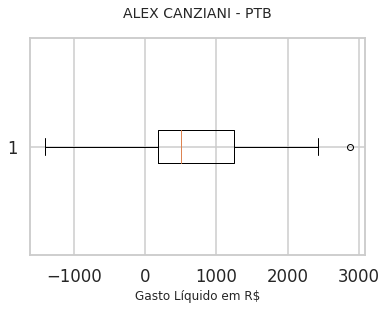

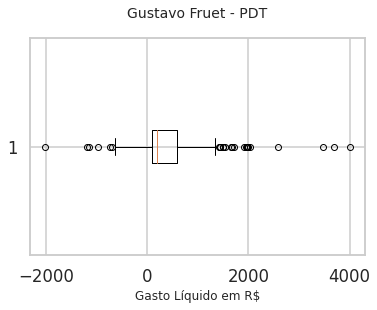

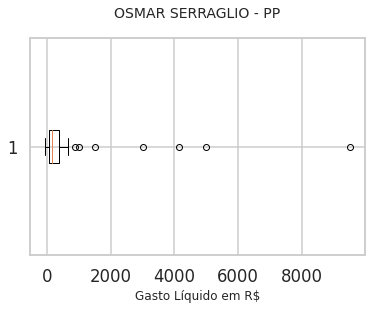

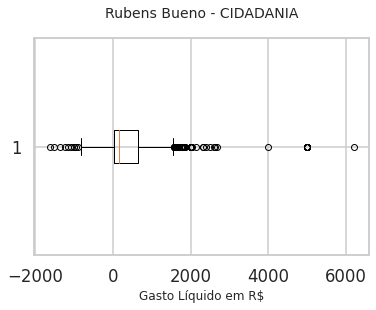

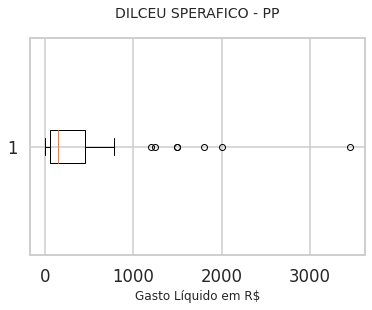

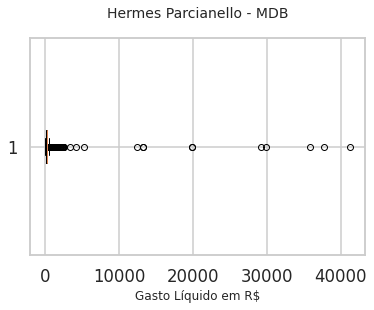

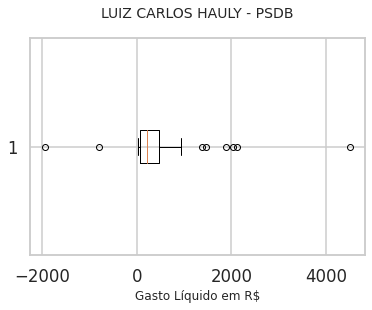

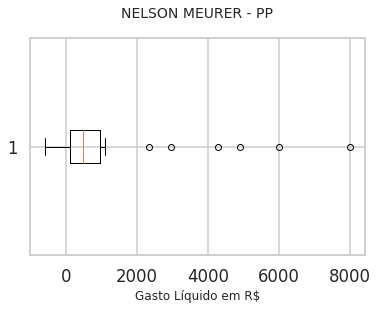

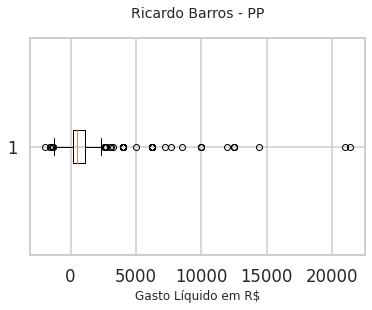

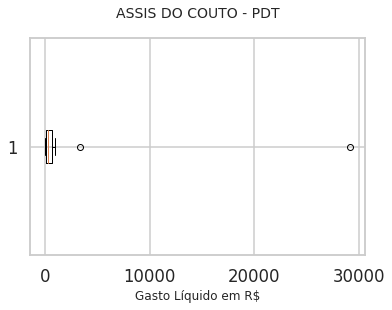

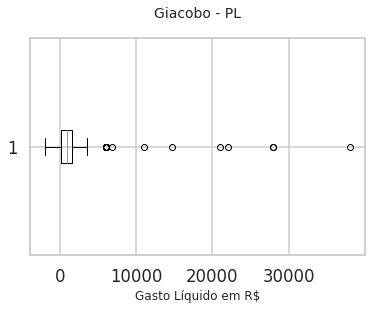

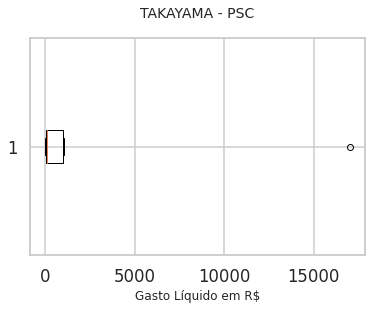

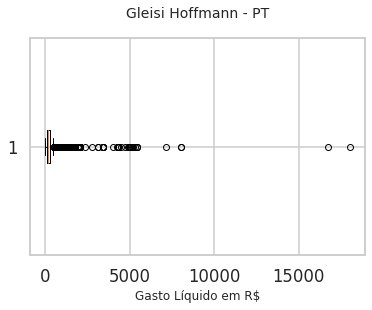

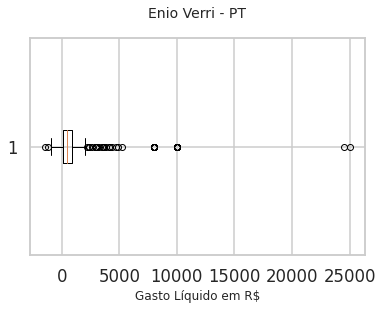

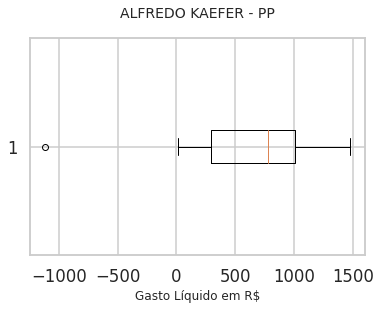

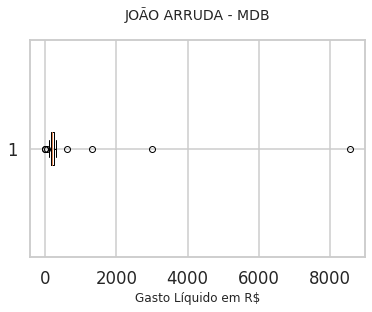

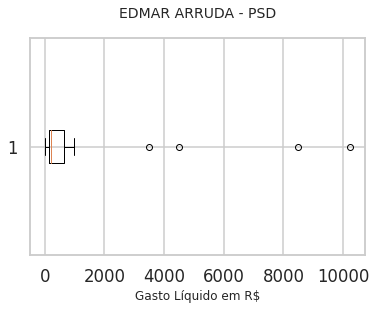

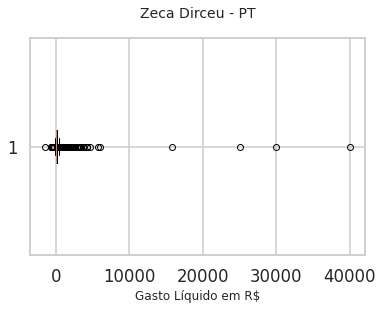

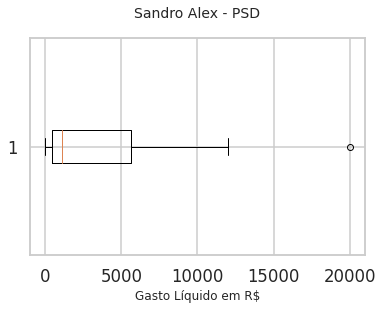

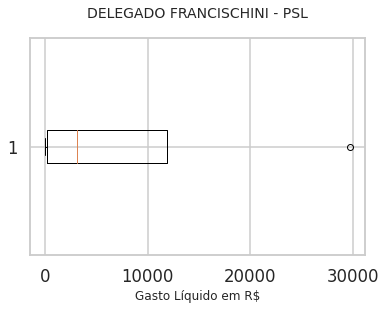

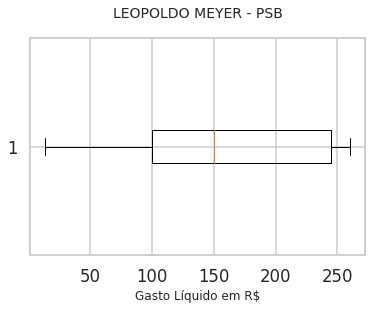

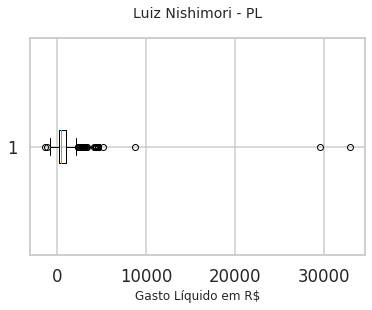

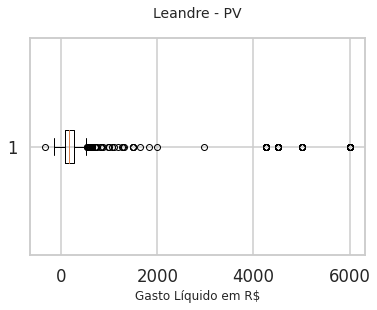

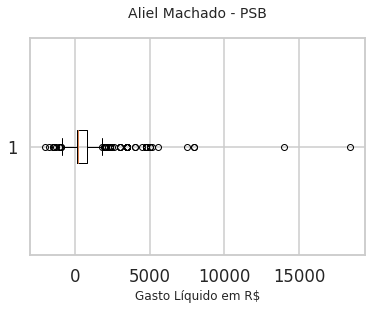

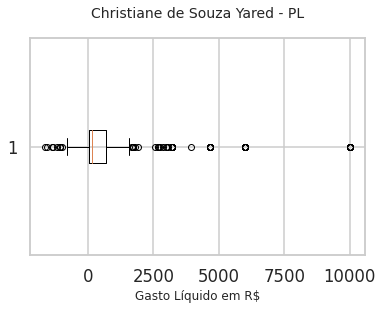

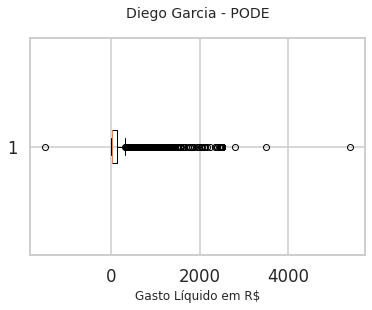

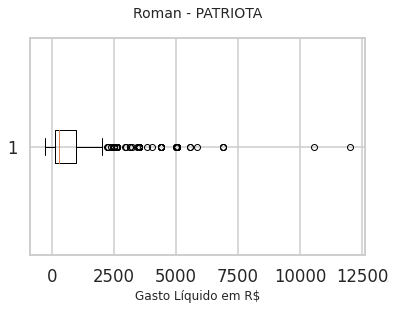

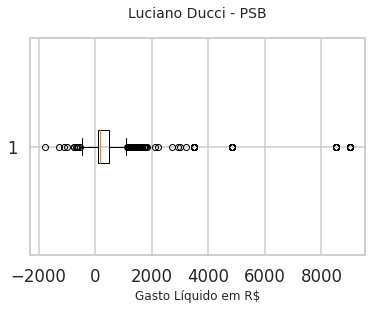

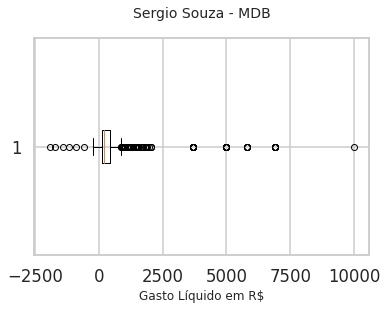

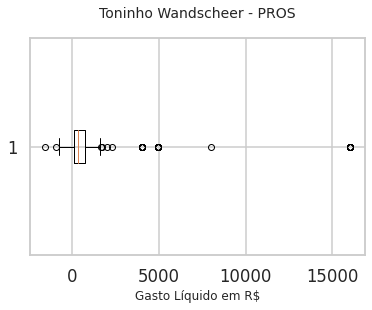

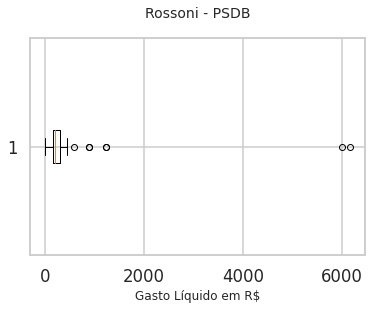

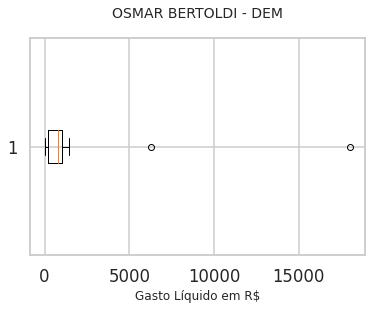

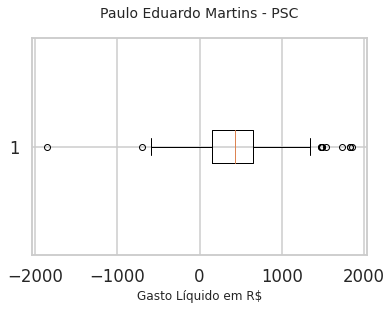

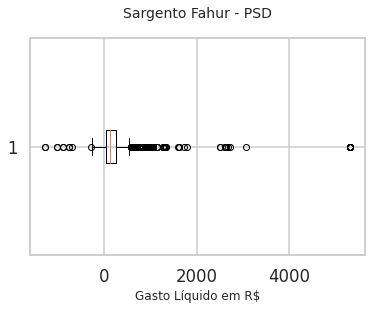

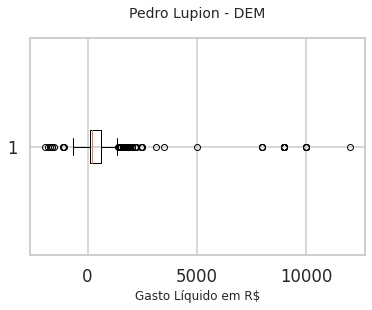

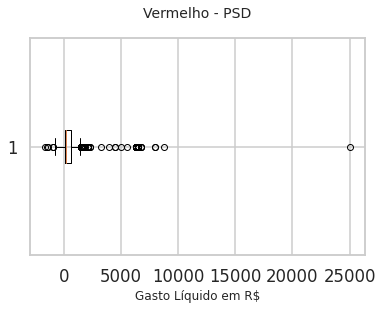

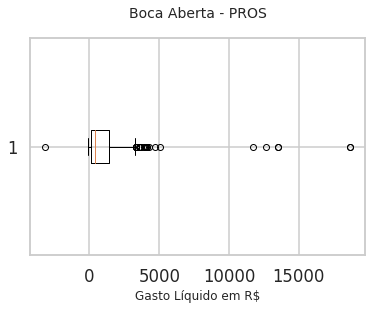

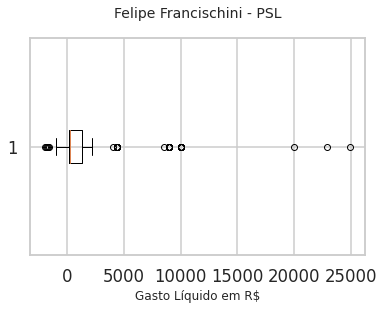

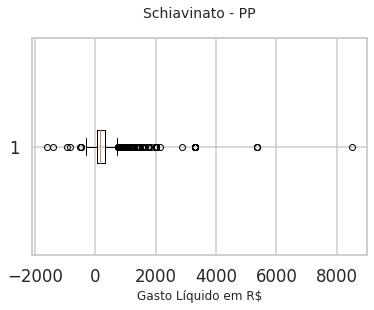

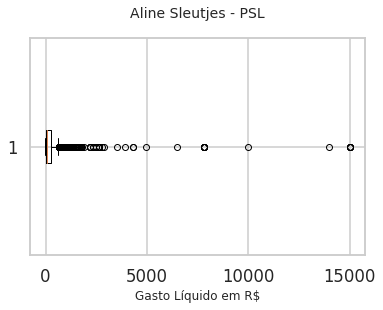

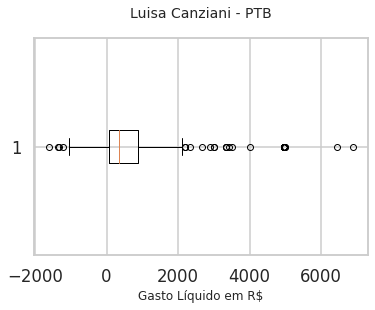

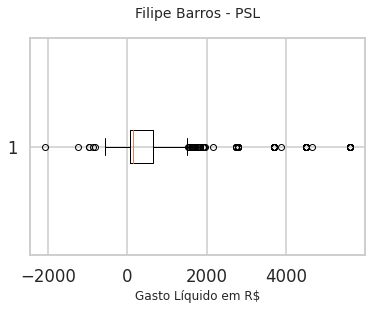

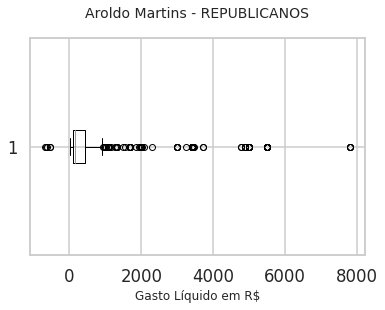

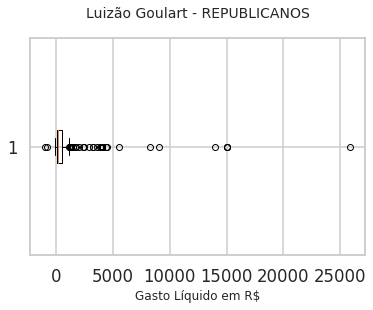

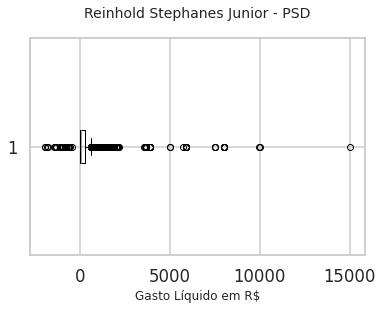

In [116]:
for nome in range(len(custo_para_pr.Nome) ):
    partido = deputados_pr.query('txNomeParlamentar == "'+str(deputados[nome])+'"').sgPartido.unique()[0]
    
    plt.figure()
    plt.boxplot(custo_para_pr.loc[nome].Custo, vert=False)
    #sns.boxplot(x=custo_para_pr.loc[nome].Custo, data=custo_para_pr)
    plt.title(str(custo_para_pr.Nome[nome] + ' - '+ partido), fontsize=14, pad=20)
    plt.xlabel("Gasto Líquido em R$", fontsize=12)
    plt.grid(True)
    plt.show()

# Gasto mais comum de cada parlamentar

In [161]:
def retorna_gasto_mais_comum(nome):

    partido = deputados_pr.query(f'txNomeParlamentar == "{nome}"').sgPartido.unique()[0]
    gasto_mais_comum = deputados_pr.query(f'txNomeParlamentar == "{nome}"').txtDescricao.value_counts().index[0]
    valor = round(deputados_pr.query(f'txNomeParlamentar == "{nome}"').query(f'txtDescricao == "{gasto_mais_comum}"').vlrLiquido.sum(), 2)
    total_gasto = deputados_pr.query('txNomeParlamentar == "'+str(nome)+'"').vlrLiquido.sum()
    nome_partido = f'{nome} ({partido})'

    return (nome_partido, partido, gasto_mais_comum, valor, total_gasto)

In [162]:
gasto_mais_comun_deputados = list()

for deputado in deputados:
    gasto_mais_comun_deputados.append(retorna_gasto_mais_comum(deputado))
    
gasto_mais_comun_deputados = pd.DataFrame(gasto_mais_comun_deputados, columns=['Nome', 'Partido','Gasto Mais Comum', 'Valor', 'Soma de todos os gastos'])

Esta tabela ilustra o gasto mais comum do parlamentar e o valor total do serviço. A columa "Soma de todos os gastos" representa a soma de todos os serviços do parlamentar.

In [163]:
gasto_mais_comun_deputados.sort_values(by='Soma de todos os gastos', ascending=False)

,Nome,Partido,Gasto Mais Comum,Valor,Soma de todos os gastos
17,Zeca Dirceu (PT),PT,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",12637.20,486633.86
8,Ricardo Barros (PP),PP,PASSAGEM AÉREA - RPA,157405.35,476682.87
21,Luiz Nishimori (PL),PL,PASSAGEM AÉREA - RPA,107219.07,467932.71
27,Luciano Ducci (PSB),PSB,COMBUSTÍVEIS E LUBRIFICANTES.,54645.47,466485.07
13,Enio Verri (PT),PT,PASSAGEM AÉREA - RPA,89382.12,466282.58
28,Sergio Souza (MDB),MDB,COMBUSTÍVEIS E LUBRIFICANTES.,63420.84,465648.48
23,Aliel Machado (PSB),PSB,PASSAGEM AÉREA - RPA,155401.65,463426.80
26,Roman (PATRIOTA),PATRIOTA,PASSAGEM AÉREA - RPA,91675.95,463379.09
29,Toninho Wandscheer (PROS),PROS,PASSAGEM AÉREA - RPA,103437.82,462797.83
10,Giacobo (PL),PL,PASSAGEM AÉREA - RPA,149554.13,450564.06


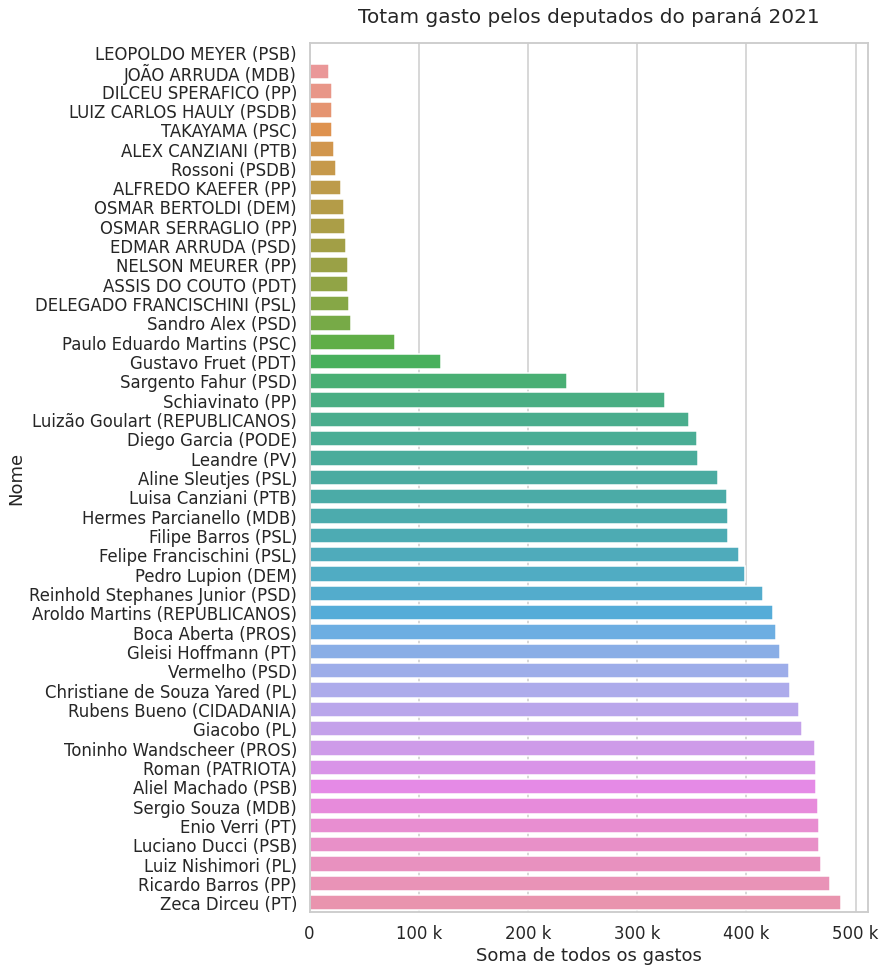

In [164]:
from matplotlib import ticker

plt.figure(figsize=(10,16))
plt.title('Totam gasto pelos deputados do paraná 2021', fontsize=20, pad=20)
ax = sns.barplot(y='Nome', x='Soma de todos os gastos', data=gasto_mais_comun_deputados.sort_values(by='Soma de todos os gastos'))
ax.set_yticklabels(gasto_mais_comun_deputados.sort_values(by='Soma de todos os gastos').Nome)
ax.xaxis.set_major_formatter(ticker.EngFormatter())
#ax.grid(axis='y')
ax;

In [180]:
gasto_por_partido = (gasto_mais_comun_deputados.groupby('Partido').sum()['Soma de todos os gastos'] / gasto_mais_comun_deputados.Partido.value_counts()).round()
gasto_por_partido = gasto_por_partido.sort_values(ascending=False).to_frame()
gasto_por_partido.columns = ['Gasto medio por deputado']

In [181]:
gasto_por_partido

,Gasto medio por deputado
PATRIOTA,463379.0
PT,461143.0
PL,452758.0
CIDADANIA,447826.0
PROS,445102.0
REPUBLICANOS,385805.0
PV,355462.0
PODE,355124.0
PSB,310227.0
PSL,296457.0


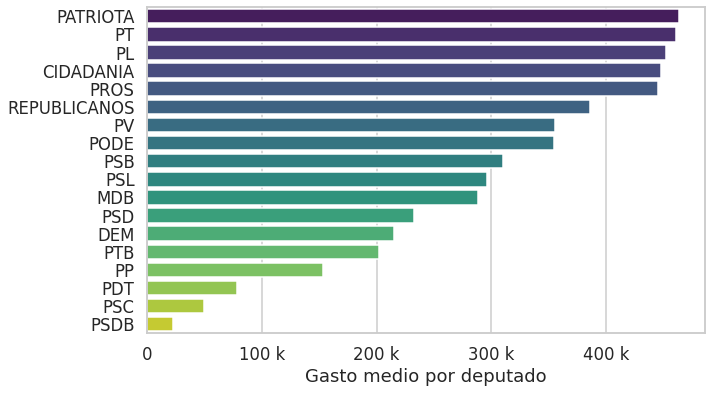

In [183]:
plt.figure(figsize=(10,6))

ax = sns.barplot(data = gasto_por_partido,x = 'Gasto medio por deputado', y = gasto_por_partido.index, palette='viridis')
ax.xaxis.set_major_formatter(ticker.EngFormatter())